In [4]:
### import libraries

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import gensim
import numpy as np
import spacy
import math

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

import os, re, operator, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Edward
[nltk_data]     Apostol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Edward
[nltk_data]     Apostol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Edward
[nltk_data]     Apostol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
def clean(text):
    return str(''.join([i if ord(i) < 128 else ' ' for i in text]))

test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'

In [11]:
text = open(lee_train_file).read()
nlp = spacy.load('en_core_web_lg')
stop_words = stopwords.words('english')

In [12]:
for stopword in stop_words:
    lexeme = nlp.vocab['stopword']
    lexeme.is_stop = True

In [13]:
doc = nlp(clean(text))

In [14]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [18]:
texts, article = [], []
for w in doc:
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        article.append(w.lemma_)
    if w.text == '\n':
        texts.append(article)
        article = []

In [19]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New',
  'South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south',
  'west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue',
  'Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New',
  'South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New',
  'South',
  'Wales',
  'Rural',
  'Fire',
  'Service',
  'say',
  'weather',
  'condition',
  'cause',
  'fire',
  'burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',


In [50]:
transformed_texts = [' '.join(i) for i in texts]

In [51]:
transformed_texts

['hundred people force vacate home Southern Highlands New South Wales strong wind today push huge bushfire town Hill new blaze near Goulburn south west Sydney force closure Hume Highway 4:00pm AEDT marked deterioration weather storm cell move east Blue Mountains force authority decision evacuate people home outlying street Hill New South Wales southern highland estimated resident leave home nearby Mittagong New South Wales Rural Fire Service say weather condition cause fire burn finger formation ease fire unit Hill optimistic defend property blaze burn New Year Eve New South Wales fire crew call new fire gunning south Goulburn detail available stage fire authority say close Hume Highway direction new fire Sydney west long threaten property Cranebrook area rain fall part Illawarra Sydney Hunter Valley north coast Bureau Meteorology Claire Richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fac

In [52]:
transformed_texts_1 = [i.lower() for i in transformed_texts]

In [53]:
transformed_texts_2 = [re.sub(r'\w*\d\w*', '', i).strip() for i in transformed_texts_1]

In [55]:
transformed_texts_2

['hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact pro

In [57]:
adjectives = []

doc = nlp(' '.join(transformed_texts_2))

for token in doc:
    if token.pos_ == 'ADJ' and token.text not in adjectives:
        adjectives.append(token.text)

In [47]:
adjectives

['southern',
 'new',
 'south',
 'strong',
 'huge',
 'marked',
 'blue',
 'outlying',
 'rural',
 'optimistic',
 'available',
 'close',
 'little',
 'significant',
 'far',
 'associate',
 'indian',
 'suspect',
 'militant',
 'pakistani',
 'extremist',
 'taiba',
 'jaish',
 'behest',
 'military',
 'tat',
 'diplomatic',
 'national',
 'few',
 'western',
 'northern',
 'free',
 'political',
 'economic',
 'interim',
 'key',
 'massive',
 'foreign',
 'senior',
 'fresh',
 'bad',
 'international',
 'inappropriate',
 'unprofessional',
 'chief',
 'executive',
 'angry',
 'federal',
 'safe',
 'afghani',
 'long',
 'major',
 'mass',
 'pacific',
 'total',
 'temporary',
 'future',
 'united',
 'decisive',
 'single',
 'unbeatable',
 'old',
 'shaky',
 'straight',
 'swiss',
 'final',
 'great',
 'tentative',
 'hard',
 'minute',
 'american',
 'tough',
 'junior',
 'early',
 'complete',
 'relative',
 'tenacious',
 'hot',
 'dusty',
 'red',
 'cross',
 'welcome',
 'mild',
 'severe',
 'dry',
 'high',
 'westerly',
 'reluct

In [48]:
len(adjectives)

988

In [58]:
doc.ents

(today,
 sydney,
 claire richards,
 night,
 kilometer,
 dozen,
 india,
 india,
 pakistan,
 december,
 yesterday,
 hafiz mohammed,
 karachi,
 india,
 india,
 pakistan,
 week ago,
 week ago,
 end year,
 year,
 britain,
 afghanistan,
 today,
 monica seles jan michael,
 year old,
 minute year old,
 americans,
 tennis year,
 american,
 hundred,
 years eve,
 afternoon,
 thursday,
 overnight,
 friday,
 sydney,
 newcastle,
 morning,
 overnight,
 grafton,
 phil,
 picton,
 hour,
 sydney,
 picton,
 appin,
 morning,
 ten thousand,
 queensland,
 night,
 early evening,
 year eve,
 alejandro,
 pervez musharraf,
 pakistan,
 india,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 musharraf,
 india,
 pakistan,
 musharraf,
 indian,
 india,
 india,
 friday,
 vajpayee,
 january,
 india,
 india,
 pakistan,
 december,
 india,
 pakistan,
 pakistan,
 pakistan,
 abdul sattar,
 saturday,
 musharraf,
 sunday,
 pakistan,
 abdullah,
 british,
 israeli,
 palestinian,
 israeli,
 palestini

In [60]:
entities = []

doc = nlp(' '.join(transformed_texts_2))

for token in doc.ents:
    if token.text not in entities:
        entities.append(token.text)
        
len(entities)

In [61]:
entities

['today',
 'sydney',
 'claire richards',
 'night',
 'kilometer',
 'dozen',
 'india',
 'pakistan',
 'december',
 'yesterday',
 'hafiz mohammed',
 'karachi',
 'week ago',
 'end year',
 'year',
 'britain',
 'afghanistan',
 'monica seles jan michael',
 'year old',
 'minute year old',
 'americans',
 'tennis year',
 'american',
 'hundred',
 'years eve',
 'afternoon',
 'thursday',
 'overnight',
 'friday',
 'newcastle',
 'morning',
 'grafton',
 'phil',
 'picton',
 'hour',
 'appin',
 'ten thousand',
 'queensland',
 'early evening',
 'year eve',
 'alejandro',
 'pervez musharraf',
 'musharraf',
 'indian',
 'vajpayee',
 'january',
 'abdul sattar',
 'saturday',
 'sunday',
 'abdullah',
 'british',
 'israeli',
 'palestinian',
 'october',
 'early hour morning',
 'zeus hour',
 'week',
 'shaun',
 'sanchez',
 'month',
 'switzerland',
 'peter jackson',
 'new years',
 'adolfo rodriguez saa',
 'monday',
 'florida',
 'atlanta',
 'mm',
 'gary',
 'half',
 'day ago',
 'peter blake',
 'day hour',
 'margaret cron

In [62]:
len(entities)

495

In [75]:
def IDF(corpus, unique_words):
    idf_dict={}
    N=len(corpus)
    for i in unique_words:
        count=0
        for sen in corpus:
            if i in sen.split():
                count = count + 1
            idf_dict[i]=(math.log(((N+1)/(count+1))))+1
    return idf_dict

def fit(whole_data):
    unique_words = set()
    if isinstance(whole_data, (list,)):
        for x in whole_data:
            for y in x.split():
                if len(y)<2:
                    continue
                unique_words.add(y)
        unique_words = sorted(list(unique_words))
        vocab = {j:i for i,j in enumerate(unique_words)}
        Idf_values_of_all_unique_words = IDF(whole_data, unique_words)
    return vocab, Idf_values_of_all_unique_words

def transform(dataset, vocabulary, idf_values):
    vocab={}
    sparse_matrix = csr_matrix( (len(dataset), len(vocabulary)), dtype = np.float64)
    for row in range(0, len(dataset)):
        number_of_words_in_sentence = Counter(dataset[row].split())
        for word in dataset[row].split():
            if word in list(vocabulary.keys()):
                tf_idf_values=(number_of_words_in_sentence[word]/len(dataset[row].split()))*(idf_values[word])
                sparse_matrix[row, vocabulary[word]]=tf_idf_value
                vocab[word] = tf_idf_value
    return vocab

In [76]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_2)

In [78]:
idf_of_vocabulary

{'aamer': 6.0106352940962555,
 'aarage': 6.0106352940962555,
 'abandon': 5.0943445622221,
 'abate': 5.605170185988092,
 'abbott': 6.0106352940962555,
 'abc': 5.605170185988092,
 'abdel': 5.605170185988092,
 'abdomen': 6.0106352940962555,
 'abdominal': 6.0106352940962555,
 'abduct': 6.0106352940962555,
 'abduction': 6.0106352940962555,
 'abdul': 5.0943445622221,
 'abdullah': 5.605170185988092,
 'abegglen': 5.31748811353631,
 'abide': 6.0106352940962555,
 'ability': 4.912023005428146,
 'able': 3.870569130599985,
 'abloy': 5.31748811353631,
 'ablution': 6.0106352940962555,
 'ably': 6.0106352940962555,
 'aboard': 4.7578723256008875,
 'aboriginal': 5.31748811353631,
 'abortion': 6.0106352940962555,
 'abroad': 5.605170185988092,
 'abruptly': 6.0106352940962555,
 'abscond': 5.605170185988092,
 'absolutely': 4.506557897319982,
 'abstain': 6.0106352940962555,
 'abu': 4.912023005428146,
 'abuse': 4.506557897319982,
 'abusive': 5.605170185988092,
 'aca': 6.0106352940962555,
 'academic': 6.0106352

In [79]:
sorted_idf = dict(sorted(idf_of_vocabulary.items(), key=operator.itemgetter(1), reverse=True))

In [80]:
sorted_idf

{'aamer': 6.0106352940962555,
 'aarage': 6.0106352940962555,
 'abbott': 6.0106352940962555,
 'abdomen': 6.0106352940962555,
 'abdominal': 6.0106352940962555,
 'abduct': 6.0106352940962555,
 'abduction': 6.0106352940962555,
 'abide': 6.0106352940962555,
 'ablution': 6.0106352940962555,
 'ably': 6.0106352940962555,
 'abortion': 6.0106352940962555,
 'abruptly': 6.0106352940962555,
 'abstain': 6.0106352940962555,
 'aca': 6.0106352940962555,
 'academic': 6.0106352940962555,
 'accc': 6.0106352940962555,
 'accelerate': 6.0106352940962555,
 'acceptable': 6.0106352940962555,
 'accolade': 6.0106352940962555,
 'accommodation': 6.0106352940962555,
 'accountable': 6.0106352940962555,
 'accounting': 6.0106352940962555,
 'accrue': 6.0106352940962555,
 'accuracy': 6.0106352940962555,
 'accusation': 6.0106352940962555,
 'achievement': 6.0106352940962555,
 'acquisition': 6.0106352940962555,
 'activist': 6.0106352940962555,
 'actress': 6.0106352940962555,
 'adams': 6.0106352940962555,
 'adhere': 6.010635

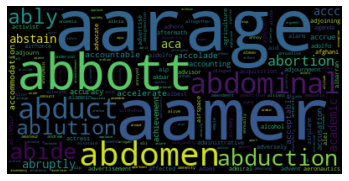

In [81]:
wordcloud= WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [106]:
stop_words.extend(['aamer'])
stopwords_dict = Counter(stop_words)
transformed_texts_3 = [' '.join([word for word in i.split() if word not in stopwords_dict]) for i in transformed_texts_2]

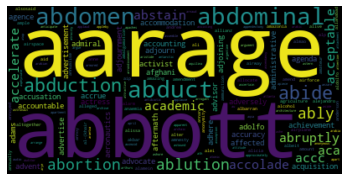

In [108]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_3)
wordcloud= WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [109]:
final_output = transform(transformed_texts_3, Vocabulary, idf_of_vocabulary)

NameError: name 'tf_idf_value' is not defined

### Shortcut of TFIDF

In [100]:
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5, encoding='latin-1', ngram_range=(1,1), stop_words=stop_words)
features = tfidf.fit_transform(transformed_texts_3)
d = tfidf.vocabulary_

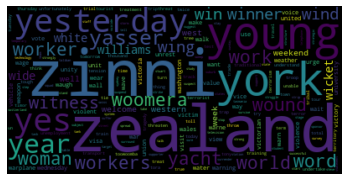

In [104]:
wordcloud= WordCloud().generate_from_frequencies(d)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [105]:
sid = SentimentIntensityAnalyzer()
for i in range(len(transformed_texts_3)):
    print(transformed_texts_3[i]+ ':')
    scores = sid.polarity_scores(transformed_texts_3[i])
    print(scores)

hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact proba

{'neg': 0.161, 'neu': 0.624, 'pos': 0.215, 'compound': 0.7269}
australian casino generate $ income financial year australian bureau statistics find gambling big money winner casino make cent $ total income government take $ casino gambling taxis levy employee pay $ work despite expense profit australian casino increase cent year end june year poker gaming machine gaming table australia:
{'neg': 0.075, 'neu': 0.805, 'pos': 0.12, 'compound': 0.5096}
royal commission building industry hold public hearing melbourne today howard government establish commission july prior call federal election prompt union claim political witch hunt royal commissioner terence cole qc stress independence inquiry examine claim corruption coercion anti competitive behaviour industry union initially refuse cooperate inquiry key union figure include construction forestry mining energy union cfmeu secretary martin kingham summons evidence finding expect month:
{'neg': 0.139, 'neu': 0.807, 'pos': 0.054, 'compound':

In [110]:
### Topic Modelling

texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New',
  'South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south',
  'west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue',
  'Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New',
  'South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New',
  'South',
  'Wales',
  'Rural',
  'Fire',
  'Service',
  'say',
  'weather',
  'condition',
  'cause',
  'fire',
  'burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',


In [111]:
bigram = gensim.models.Phrases(texts)
texts = [bigram[line] for line in texts]

In [112]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New_South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south_west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue_Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New_South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New_South',
  'Wales',
  'Rural_Fire',
  'Service',
  'say',
  'weather_condition',
  'cause',
  'fire_burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',
  'New_South',
  'Wales',
  'fire',
  'c

In [113]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [114]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 2),
  (10, 3),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 4),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 4),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 5),
  (56, 2),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 3),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 1),
  (90, 4),
  (91, 1)

In [115]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [116]:
lsimodel.show_topics(num_topics=5)

[(0,
  '-0.788*"say" + -0.142*"Mr" + -0.095*"force" + -0.094*"israeli" + -0.094*"people" + -0.083*"Australia" + -0.082*"kill" + -0.080*"attack" + -0.079*"palestinian" + -0.078*"official"'),
 (1,
  '-0.387*"israeli" + -0.345*"palestinian" + -0.286*"Mr_Arafat" + -0.192*"Israel" + -0.177*"official" + 0.164*"say" + -0.164*"Hamas" + -0.156*"kill" + -0.151*"West_Bank" + -0.136*"attack"'),
 (2,
  '-0.312*"Afghanistan" + -0.292*"force" + -0.216*"Al_Qaeda" + -0.194*"bin_Laden" + -0.158*"fighter" + -0.153*"Taliban" + -0.151*"Tora_Bora" + -0.150*"Pakistan" + -0.140*"afghan" + 0.108*"fire"'),
 (3,
  '0.405*"fire" + 0.291*"area" + 0.245*"Sydney" + 0.194*"firefighter" + 0.178*"north" + 0.168*"wind" + 0.168*"Wales" + 0.168*"New_South" + 0.142*"south" + 0.129*"line"'),
 (4,
  '-0.252*"Mr" + 0.220*"test" + 0.219*"Australia" + 0.204*"day" + 0.185*"match" + 0.179*"win" + 0.173*"South_Africa" + 0.170*"wicket" + 0.152*"good" + 0.149*"play"')]

In [117]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [119]:
ldamodel.show_topics()

[(0,
  '0.041*"say" + 0.008*"Mr" + 0.005*"year" + 0.004*"people" + 0.004*"Afghanistan" + 0.004*"Australia" + 0.003*"United_States" + 0.003*"tell" + 0.003*"Government" + 0.003*"attack"'),
 (1,
  '0.020*"say" + 0.006*"day" + 0.005*"force" + 0.004*"Sydney" + 0.004*"line" + 0.004*"Mr" + 0.003*"fire" + 0.003*"New_South" + 0.003*"area" + 0.003*"Australia"'),
 (2,
  '0.025*"say" + 0.006*"Mr" + 0.004*"union" + 0.004*"day" + 0.004*"today" + 0.004*"arrest" + 0.003*"claim" + 0.003*"Qantas" + 0.003*"year" + 0.003*"come"'),
 (3,
  '0.032*"say" + 0.007*"Mr" + 0.005*"Australia" + 0.004*"day" + 0.004*"year" + 0.003*"work" + 0.003*"test" + 0.003*"give" + 0.003*"early" + 0.003*"time"'),
 (4,
  '0.024*"say" + 0.006*"Mr" + 0.006*"people" + 0.005*"company" + 0.005*"Australia" + 0.004*"day" + 0.004*"month" + 0.003*"report" + 0.003*"give" + 0.003*"union"'),
 (5,
  '0.024*"say" + 0.004*"Mr" + 0.004*"force" + 0.004*"man" + 0.003*"win" + 0.003*"power" + 0.003*"metre" + 0.003*"today" + 0.003*"day" + 0.003*"time"

In [121]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel.show_topics()

[(0,
  '0.005*say + 0.003*storm + 0.002*hit + 0.002*guide + 0.002*tree + 0.002*Sydney + 0.002*Mr + 0.002*place + 0.002*include + 0.002*damage + 0.002*work + 0.002*Adventure_World + 0.002*Interlaken + 0.002*company + 0.002*SES + 0.002*people + 0.002*face + 0.002*Hornsby + 0.002*collapse + 0.002*death'),
 (1,
  '0.007*israeli + 0.006*say + 0.003*official + 0.003*Mr_Arafat + 0.003*palestinian + 0.003*Mr_Sharon + 0.003*West_Bank + 0.003*Hamas + 0.002*arrest + 0.002*group + 0.002*military + 0.002*senior + 0.002*militant + 0.002*source + 0.002*kill + 0.002*attack + 0.002*islamic + 0.002*palestinian_security + 0.002*town + 0.002*Palestinians'),
 (2,
  '0.008*say + 0.003*airport + 0.003*Taliban + 0.002*near + 0.002*man + 0.002*cow + 0.002*kill + 0.002*Kandahar + 0.002*night + 0.002*leave + 0.002*opposition + 0.002*head + 0.002*confirm + 0.002*tell + 0.002*report + 0.002*australian + 0.002*fighter + 0.002*Agha + 0.002*bombing + 0.002*Japan'),
 (3,
  '0.004*say + 0.003*match + 0.002*ask + 0.002*

In [122]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.024213 -0.014225       1        1  29.455422
3     -0.018729 -0.002831       2        1  17.197753
7      0.049865 -0.015469       3        1   9.204046
1     -0.002976  0.046229       4        1   9.203546
4     -0.045961 -0.025463       5        1   7.032280
8      0.042007  0.044886       6        1   6.547583
6      0.039030 -0.040098       7        1   6.420628
2     -0.026473 -0.023418       8        1   6.369087
5     -0.035709  0.039121       9        1   4.922239
9      0.023159 -0.008732      10        1   3.647418, topic_info=             Term        Freq       Total Category  logprob  loglift
90            say  837.000000  837.000000  Default  30.0000  30.0000
835       israeli   78.000000   78.000000  Default  29.0000  29.0000
842   palestinian   63.000000   63.000000  Default  28.0000  28.0000
2348      company   58.000000   58.000000  Default  27.0000  27.0000
82         people  110.000000  110.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
77            new    2.362617   67.941798  Topic10  -6.1321  -0.0477
832       include    2.206913   48.332211  Topic10  -6.2003   0.2246
200          year    2.501005   98.574156  Topic10  -6.0752  -0.3630
136          come    2.218416   62.145631  Topic10  -6.1951  -0.0215
309     Australia    2.365019  115.524154  Topic10  -6.1311  -0.5775

[791 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
636       1  0.312841           
636       2  0.187705           
636       3  0.125137           
636       4  0.062568           
636       5  0.062568           
...     ...       ...        ...
178       7  0.049012  yesterday
178       8  0.098024  yesterday
178       9  0.024506  yesterday
178      10  0.024506  yesterday
2791      4  0.594324       zone

[2178 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 8, 2, 5, 9, 7, 3, 6, 10])

In [123]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [124]:
lsitopics

[['say',
  'Mr',
  'force',
  'israeli',
  'people',
  'Australia',
  'kill',
  'attack',
  'palestinian',
  'official'],
 ['israeli',
  'palestinian',
  'Mr_Arafat',
  'Israel',
  'official',
  'say',
  'Hamas',
  'kill',
  'West_Bank',
  'attack'],
 ['Afghanistan',
  'force',
  'Al_Qaeda',
  'bin_Laden',
  'fighter',
  'Taliban',
  'Tora_Bora',
  'Pakistan',
  'afghan',
  'fire'],
 ['fire',
  'area',
  'Sydney',
  'firefighter',
  'north',
  'wind',
  'Wales',
  'New_South',
  'south',
  'line'],
 ['Mr',
  'test',
  'Australia',
  'day',
  'match',
  'win',
  'South_Africa',
  'wicket',
  'good',
  'play'],
 ['Mr',
  'say',
  'force',
  'company',
  'day',
  'metre',
  'win',
  'Australia',
  'Qantas',
  'union'],
 ['metre',
  'win',
  'event',
  'race',
  'Pakistan',
  'water',
  'India',
  'woman',
  ' ',
  'force'],
 ['Pakistan',
  'India',
  'President',
  'kill',
  'tension',
  'indian',
  'Musharraf',
  'tell',
  'people',
  'Taliban'],
 ['Mr',
  'Pakistan',
  'India',
  'Qanta

In [126]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [127]:
lsi_coherence

0.4345290598247897

In [128]:
def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
    plt.title('Topic Model Performance')

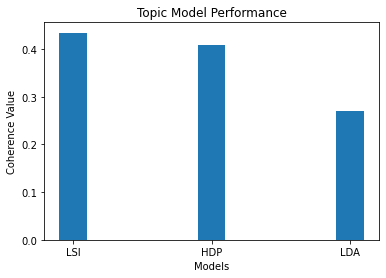

In [130]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence], ['LSI', 'HDP', 'LDA'])